In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [402]:
ls

 Volume in drive C is Windows
 Volume Serial Number is AC6A-A0D2

 Directory of C:\Users\sudik\Jupyter Python Projects\Machine Learning\Predicting Diabetes

2023-01-04  10:55 PM    <DIR>          .
2023-01-04  10:19 PM    <DIR>          ..
2023-01-04  10:21 PM    <DIR>          .ipynb_checkpoints
2023-01-04  10:15 PM            23,875 diabetes.csv
2023-01-04  10:55 PM            53,285 Predicting Diabetes Using Neural Networks.ipynb
               2 File(s)         77,160 bytes
               3 Dir(s)  789,322,260,480 bytes free


In [403]:
positive_diabetes = pd.read_csv('diabetes.csv')

In [404]:
positive_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [405]:
positive_diabetes.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [406]:
positive_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [407]:
prediction_var = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                  'BMI', 'DiabetesPedigreeFunction', 'Age']

In [408]:
from sklearn.model_selection import train_test_split
 
train, test = train_test_split(positive_diabetes, test_size = 0.20)

In [409]:
train_x = train[prediction_var]
train_y = train['Outcome']

test_x = test[prediction_var]
test_y = test['Outcome']

In [410]:
train_y

672    0
689    1
394    1
728    0
733    0
      ..
335    0
595    1
157    0
511    0
47     0
Name: Outcome, Length: 614, dtype: int64

In [411]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes = (5,3))

In [ ]:
model.fit(train_x, train_y)

In [413]:
prediction = model.predict_proba(test_x)
proba_predict = prediction[:,1]

In [414]:
prediction

array([[0.90244156, 0.09755844],
       [0.76489343, 0.23510657],
       [0.59361426, 0.40638574],
       [0.81892751, 0.18107249],
       [0.83855275, 0.16144725],
       [0.8349299 , 0.1650701 ],
       [0.26257432, 0.73742568],
       [0.35501051, 0.64498949],
       [0.94528146, 0.05471854],
       [0.70928607, 0.29071393],
       [0.90088122, 0.09911878],
       [0.70339789, 0.29660211],
       [0.57882622, 0.42117378],
       [0.69856981, 0.30143019],
       [0.58146542, 0.41853458],
       [0.63622473, 0.36377527],
       [0.73725119, 0.26274881],
       [0.61759016, 0.38240984],
       [0.53829386, 0.46170614],
       [0.74615738, 0.25384262],
       [0.72759901, 0.27240099],
       [0.64075456, 0.35924544],
       [0.72105637, 0.27894363],
       [0.5941408 , 0.4058592 ],
       [0.62387407, 0.37612593],
       [0.69039551, 0.30960449],
       [0.67904576, 0.32095424],
       [0.629211  , 0.370789  ],
       [0.35482657, 0.64517343],
       [0.89586199, 0.10413801],
       [0.

In [415]:
proba_predict

array([0.09755844, 0.23510657, 0.40638574, 0.18107249, 0.16144725,
       0.1650701 , 0.73742568, 0.64498949, 0.05471854, 0.29071393,
       0.09911878, 0.29660211, 0.42117378, 0.30143019, 0.41853458,
       0.36377527, 0.26274881, 0.38240984, 0.46170614, 0.25384262,
       0.27240099, 0.35924544, 0.27894363, 0.4058592 , 0.37612593,
       0.30960449, 0.32095424, 0.370789  , 0.64517343, 0.10413801,
       0.08887688, 0.31525979, 0.26564595, 0.54756695, 0.42729785,
       0.45807372, 0.15603761, 0.34740787, 0.36530649, 0.17251937,
       0.07854329, 0.33745538, 0.3518049 , 0.17808076, 0.37316795,
       0.33621817, 0.41619914, 0.29573938, 0.16100381, 0.34065624,
       0.39528868, 0.26907851, 0.3680779 , 0.2409817 , 0.39292037,
       0.29660728, 0.2974441 , 0.10793019, 0.34462858, 0.1997158 ,
       0.30672677, 0.39066449, 0.36328016, 0.11599774, 0.39214714,
       0.43930411, 0.35904424, 0.34932464, 0.19123263, 0.29493416,
       0.32144542, 0.18608533, 0.2892797 , 0.34343953, 0.33222

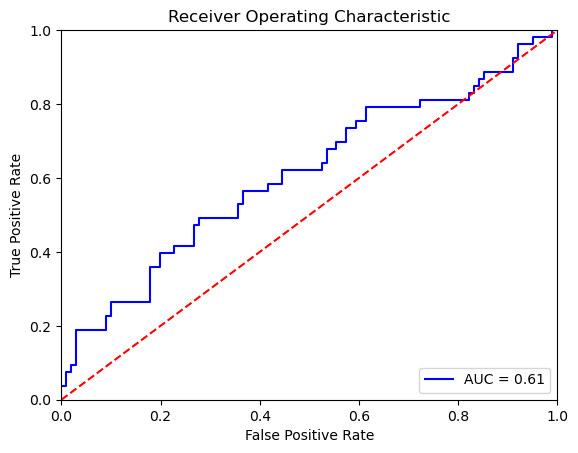

In [416]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(test_y, proba_predict)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()